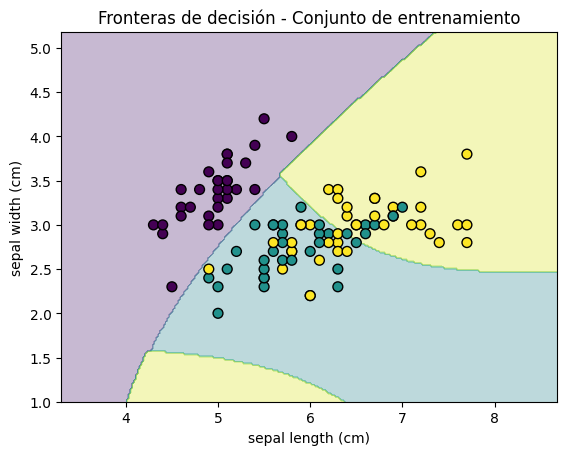

In [4]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Cargar el dataset de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar solo las primeras dos características (largo y ancho del sépalo)
y = iris.target

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir un kernel polinomial personalizado
def custom_kernel(X, Y):
    degree = 3  # Definir el grado del polinomio
    return (np.dot(X, Y.T) + 1) ** degree  # Kernel polinomial: (X.Y + 1)^3
# Crear y entrenar el clasificador SVM
clf = SVC(kernel=custom_kernel)
clf.fit(X_train, y_train)

# Crear un gráfico de los datos
def plot_decision_boundaries(X, y, clf, title):
    # Definir los límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Obtener las predicciones en toda la malla de puntos
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar las fronteras de decisión
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Dibujar también los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Llamar a la función para visualizar el conjunto de entrenamiento
plot_decision_boundaries(X_train, y_train, clf, "Fronteras de decisión - Conjunto de entrenamiento")

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()

# Convertir a DataFrame para mayor flexibilidad
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df = df[['sepal length (cm)', 'sepal width (cm)', 'target']]

# Eliminar una de las clases (por ejemplo, la clase con target == 2)
df = df[df['target'] != 2]

# Separar características (X) y etiquetas (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir en conjuntos de entrenamiento y prueba (80% para entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Imprimir la forma de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')
print(f'Tamaño de las etiquetas de entrenamiento: {y_train.shape}')
print(f'Tamaño de las etiquetas de prueba: {y_test.shape}')

Tamaño del conjunto de entrenamiento: (80, 2)
Tamaño del conjunto de prueba: (20, 2)
Tamaño de las etiquetas de entrenamiento: (80,)
Tamaño de las etiquetas de prueba: (20,)


In [6]:
# Definir un kernel polinomial personalizado
def custom_kernel(X, Y):
    degree = 3  # Definir el grado del polinomio
    return (np.dot(X, Y.T) + 1) ** degree  # Kernel polinomial: (X.Y + 1)^3
# Crear y entrenar el clasificador SVM
clf = SVC(kernel=custom_kernel)
clf.fit(X_train, y_train)


SVC(kernel=<function custom_kernel at 0x7fc0e3b29a80>)

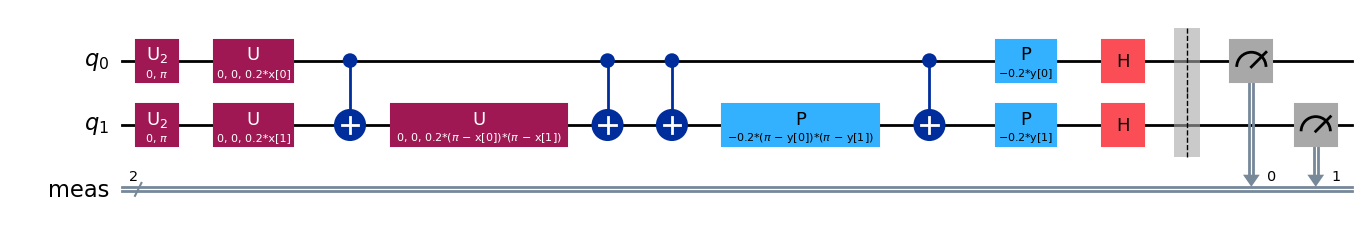

In [7]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import PauliFeatureMap
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 

# Bell Circuit
qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
)

inv_qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
    parameter_prefix='y'
).inverse()

qc.append(inv_qc, [0, 1])
qc.measure_all()
qc.decompose().decompose().draw('mpl')

In [8]:
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([(isa_qc, np.array([1, 2, 3, 4]))]).result()

print(result[0].data.meas.get_counts(), "=>", result[0].data.meas.get_counts()['00'])


{'00': 913, '01': 38, '11': 39, '10': 34} => 913


In [9]:
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([(isa_qc, np.array([1, 2, 3, 4]))]).result()

print(result[0].data.meas.get_counts(), "=>", result[0].data.meas.get_counts()['00'])


{'00': 881, '10': 43, '01': 35, '11': 65} => 881


In [10]:
x1, x2 = X_train[0], X_train[1]
x1, x2

(array([3.25794794, 2.0943951 ]), array([3.02523737, 2.61799388]))

In [11]:
import numpy as np
np.concatenate((x1, x2))

array([3.25794794, 2.0943951 , 3.02523737, 2.61799388])

In [12]:
def plot_decision_boundaries(X, y, clf, title):
    # Definir los límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Obtener las predicciones en toda la malla de puntos
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar las fronteras de decisión
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Dibujar los puntos de datos y añadir una leyenda
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50, cmap=plt.cm.Set1)

    # Añadir leyenda con las clases
    legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=class_names, title="Clases")
    plt.gca().add_artist(legend1)

    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()


In [45]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    def custom_kernel(X, Y):
        dim = len(X)
        quantum_dot = np.zeros((dim, dim))
        degree = 3  # Definir el grado del polinomio
        # features = np.concatenate(X, Y)
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                print(x, type(x), y, type(y))
                print(np.concatenate((x, y)))
                sampler_output = sampler.run([(isa_qc, np.concatenate((x, y)))]).result()
                quantum_dot[i][j] = sampler_output[0].data.meas.get_counts()['00']
        return (quantum_dot + 1) ** degree
        # print(X.shape, Y.shape)
        # print(np.dot(X, Y.T).shape, np.dot(X, Y.T))
        # return (np.dot(X, Y.T) + 1) ** degree  # Kernel polinomial: (X.Y + 1)^3
    clf = SVC(kernel=custom_kernel)
    clf.fit(X_train, y_train)
    plot_decision_boundaries(X_train, y_train, clf, "Fronteras de decisión - Conjunto de entrenamiento")

[3.25794794 2.0943951 ] <class 'numpy.ndarray'> [3.25794794 2.0943951 ] <class 'numpy.ndarray'>
[3.25794794 2.0943951  3.25794794 2.0943951 ]
[3.25794794 2.0943951 ] <class 'numpy.ndarray'> [3.02523737 2.61799388] <class 'numpy.ndarray'>
[3.25794794 2.0943951  3.02523737 2.61799388]
[3.25794794 2.0943951 ] <class 'numpy.ndarray'> [1.62897397 3.66519143] <class 'numpy.ndarray'>
[3.25794794 2.0943951  1.62897397 3.66519143]
[3.25794794 2.0943951 ] <class 'numpy.ndarray'> [0.23271057 3.14159265] <class 'numpy.ndarray'>
[3.25794794 2.0943951  0.23271057 3.14159265]
[3.25794794 2.0943951 ] <class 'numpy.ndarray'> [3.02523737 1.30899694] <class 'numpy.ndarray'>
[3.25794794 2.0943951  3.02523737 1.30899694]
[3.25794794 2.0943951 ] <class 'numpy.ndarray'> [3.25794794 6.28318531] <class 'numpy.ndarray'>
[3.25794794 2.0943951  3.25794794 6.28318531]
[3.25794794 2.0943951 ] <class 'numpy.ndarray'> [1.62897397 3.92699082] <class 'numpy.ndarray'>
[3.25794794 2.0943951  1.62897397 3.92699082]
[3.257

KeyError: '00'

In [29]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[10, 21], [32, 43], [54, 67]])
np.dot(a, b.T), np.dot(a[0], b[0])

(array([[ 52, 118, 188],
        [114, 268, 430],
        [176, 418, 672]]),
 np.int64(52))

[-1. -1.] <class 'numpy.ndarray'> [3.25794794 2.0943951 ] <class 'numpy.ndarray'>
[-1.         -1.          3.25794794  2.0943951 ]


IBMRuntimeError: 'The session is closed.'